In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import statsmodels as stm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import scipy as sp
import scipy.stats as stats
from scipy.stats import pointbiserialr, chi2_contingency
print("Completed!")

#load file
file_path = r"C:\Users\enapi\Captsone 2\Lib\heart_disease_clean.csv"
data = pd.read_csv(file_path)

#jog memory from data wrangling
print(data.head())
print(data.describe())
print(data.columns.tolist())

Completed!
   age  sex  chest_pain_type  rest_bp  chol  fbs  restecg  max_hr  \
0   52    1                0      125   212    0        1     168   
1   53    1                0      140   203    1        0     155   
2   70    1                0      145   174    0        1     125   
3   61    1                0      148   203    0        1     161   
4   62    0                0      138   294    1        1     106   

   exercise_ang  oldpeak  slope  ca  thal  target  
0             0      1.0      2   2     3       0  
1             1      3.1      0   0     3       0  
2             1      2.6      0   0     3       0  
3             0      0.0      2   1     3       0  
4             0      1.9      1   3     2       0  
             age         sex  chest_pain_type     rest_bp        chol  \
count  302.00000  302.000000       302.000000  302.000000  302.000000   
mean    54.42053    0.682119         0.963576  131.602649  246.500000   
std      9.04797    0.466426         1.0320

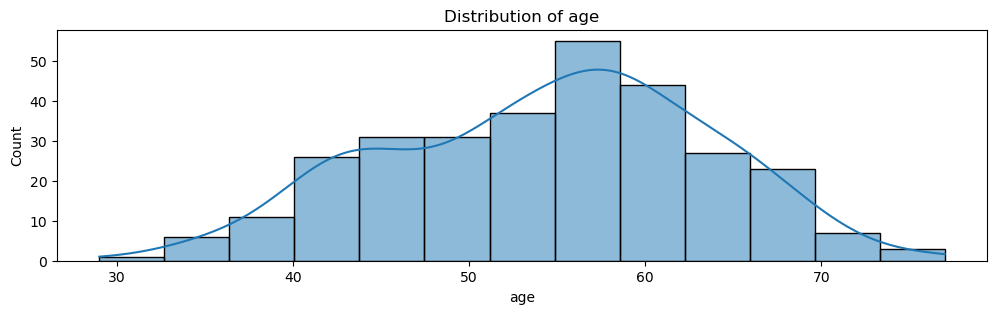

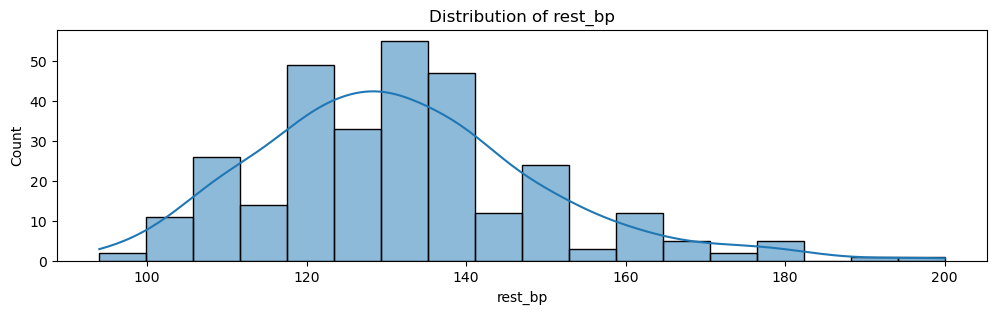

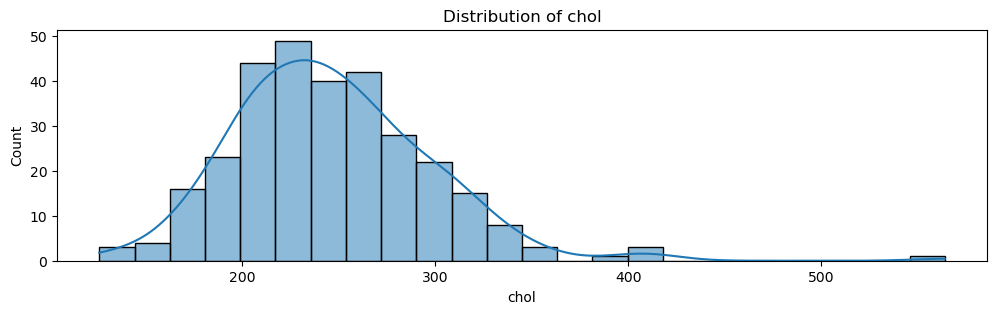

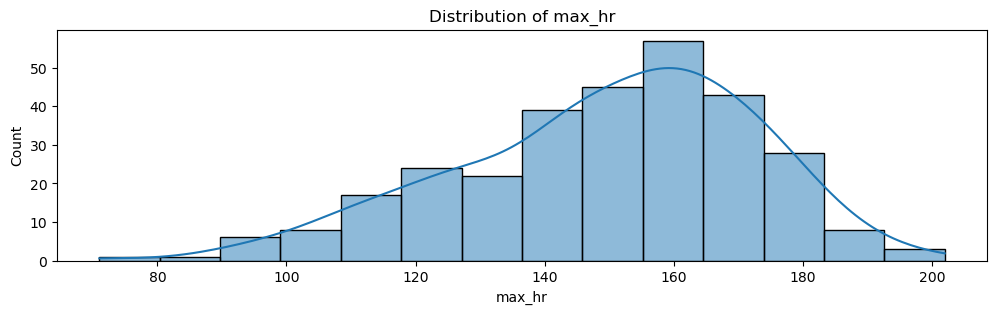

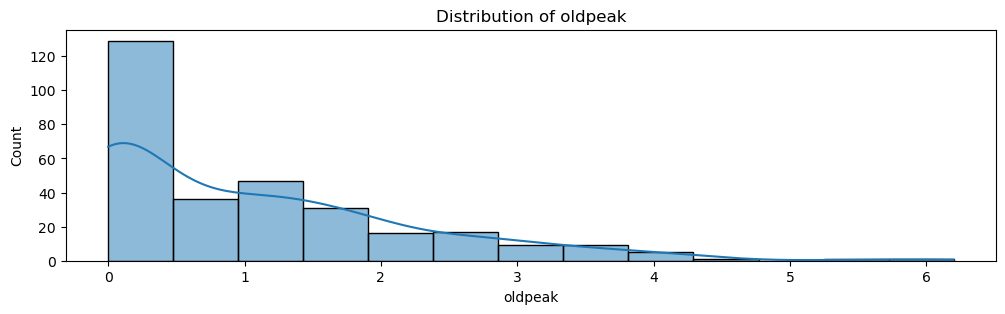

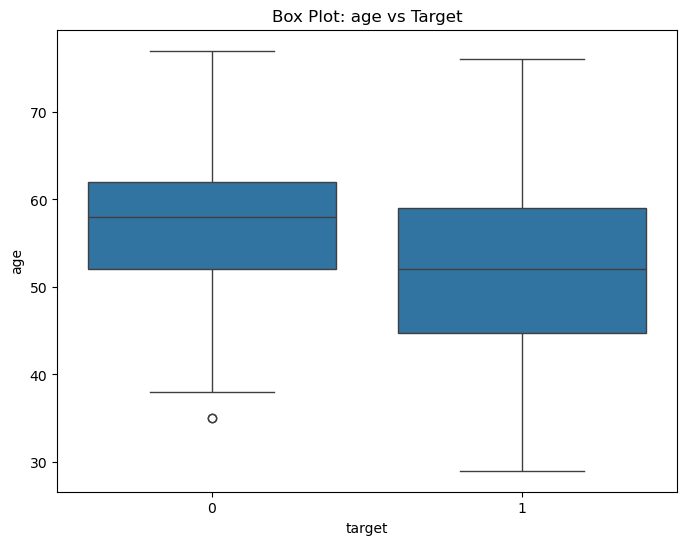

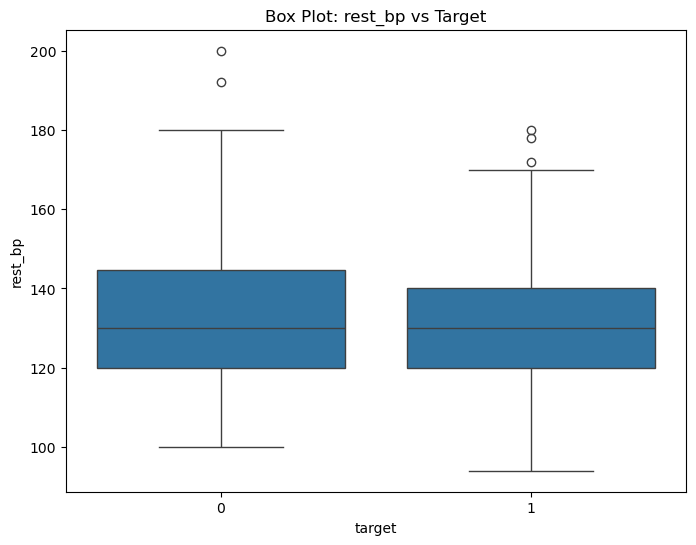

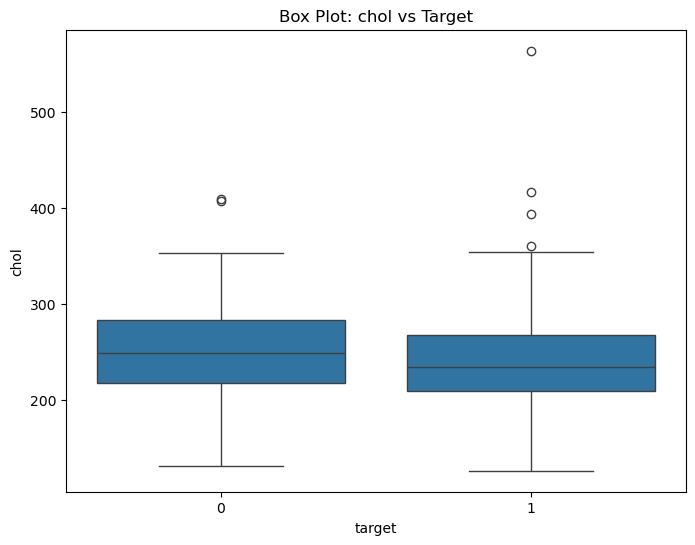

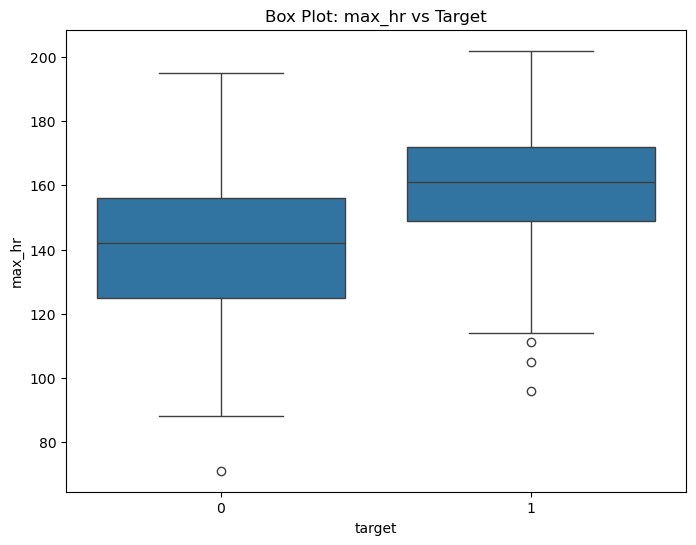

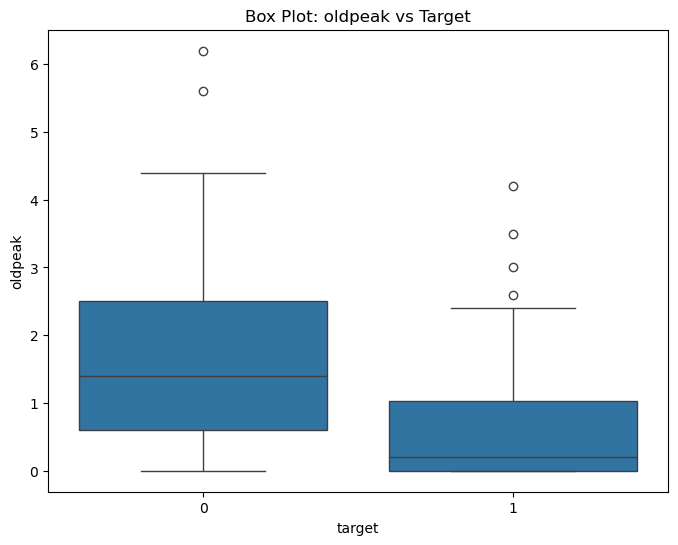

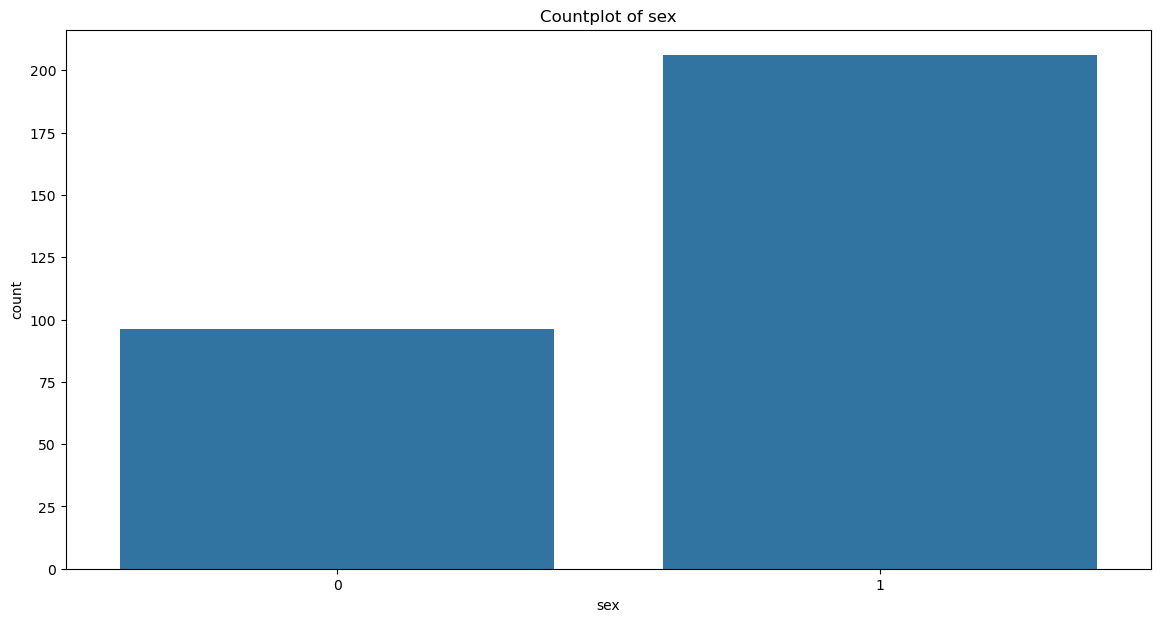

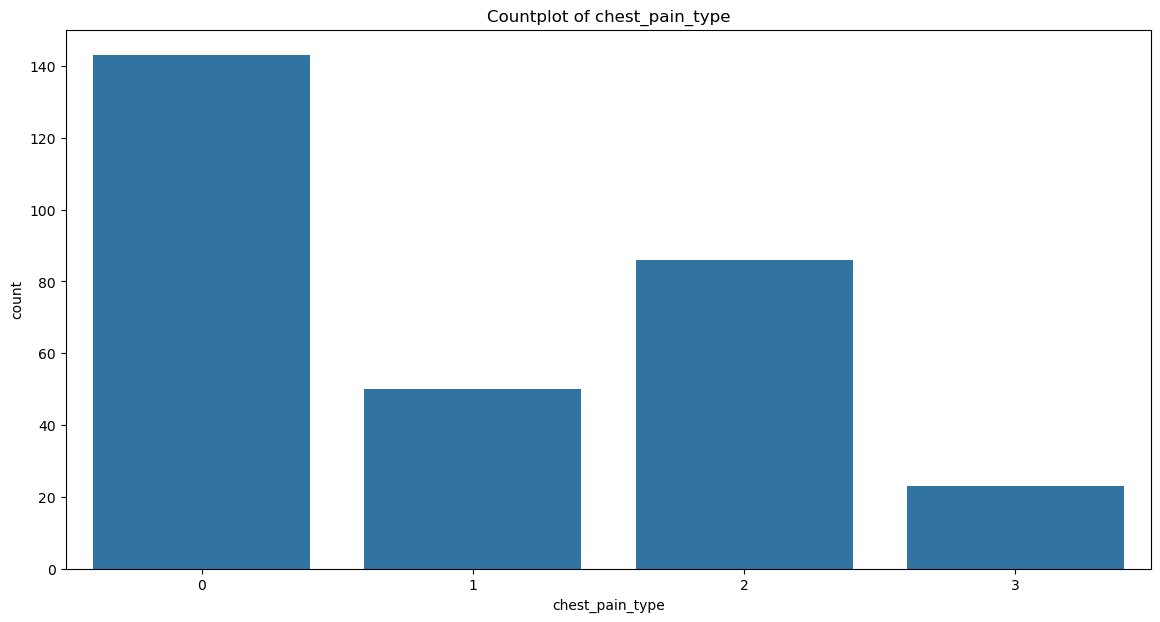

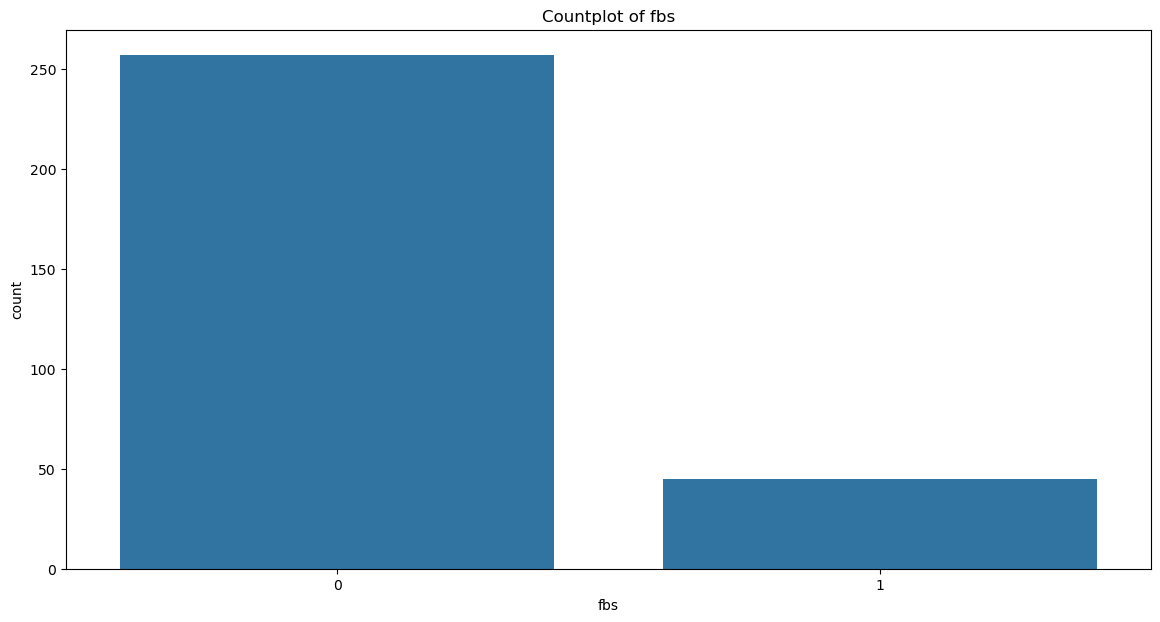

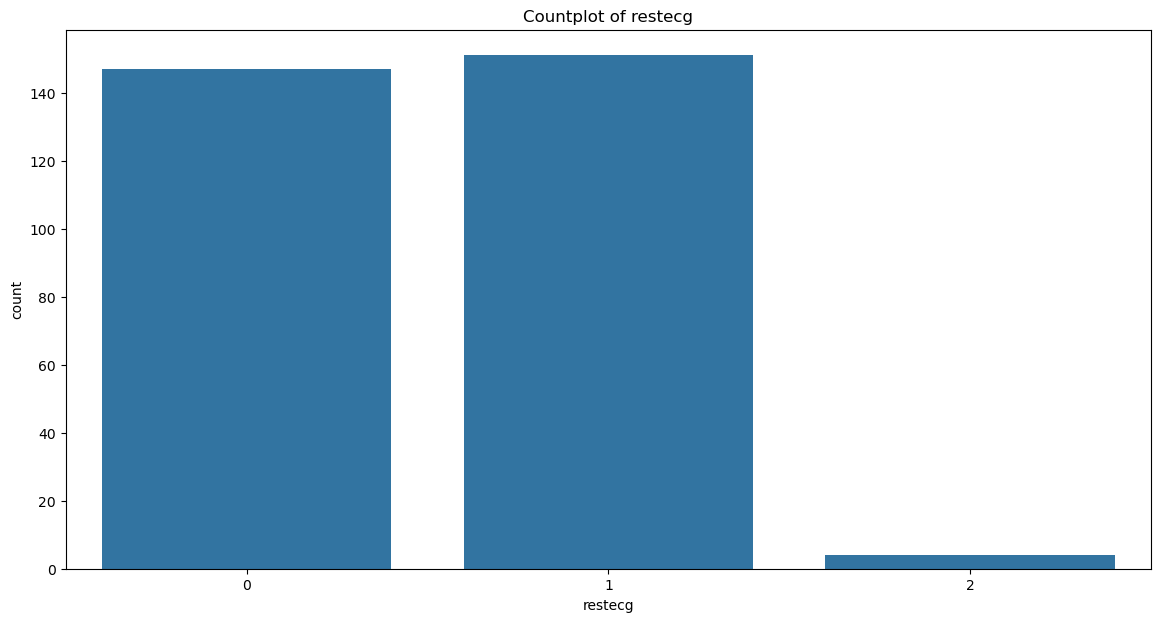

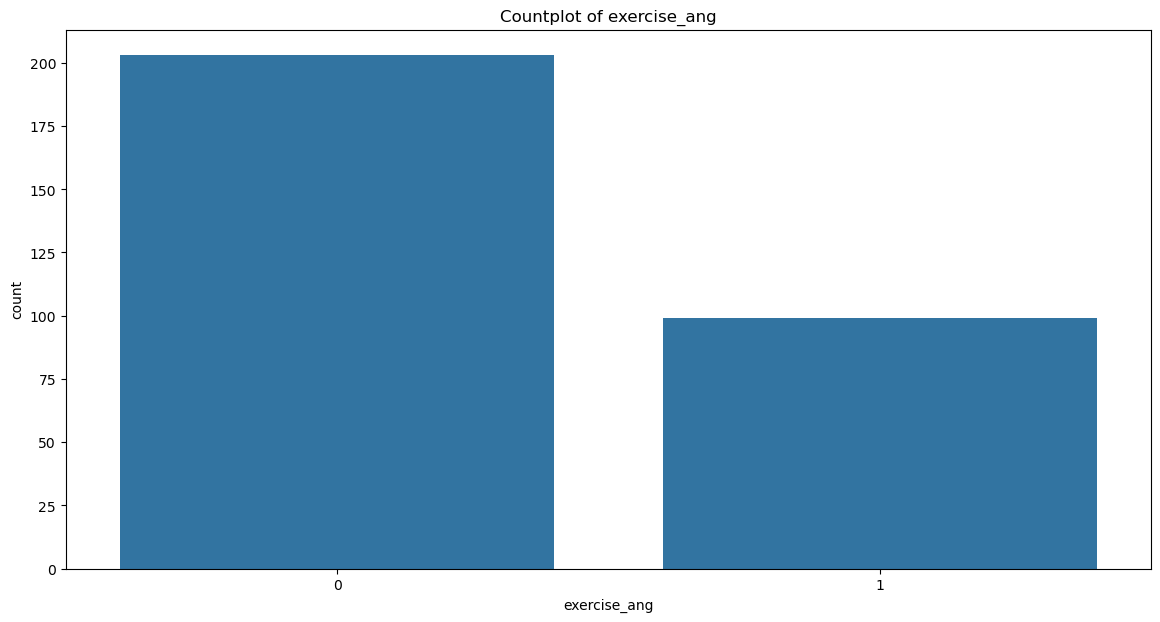

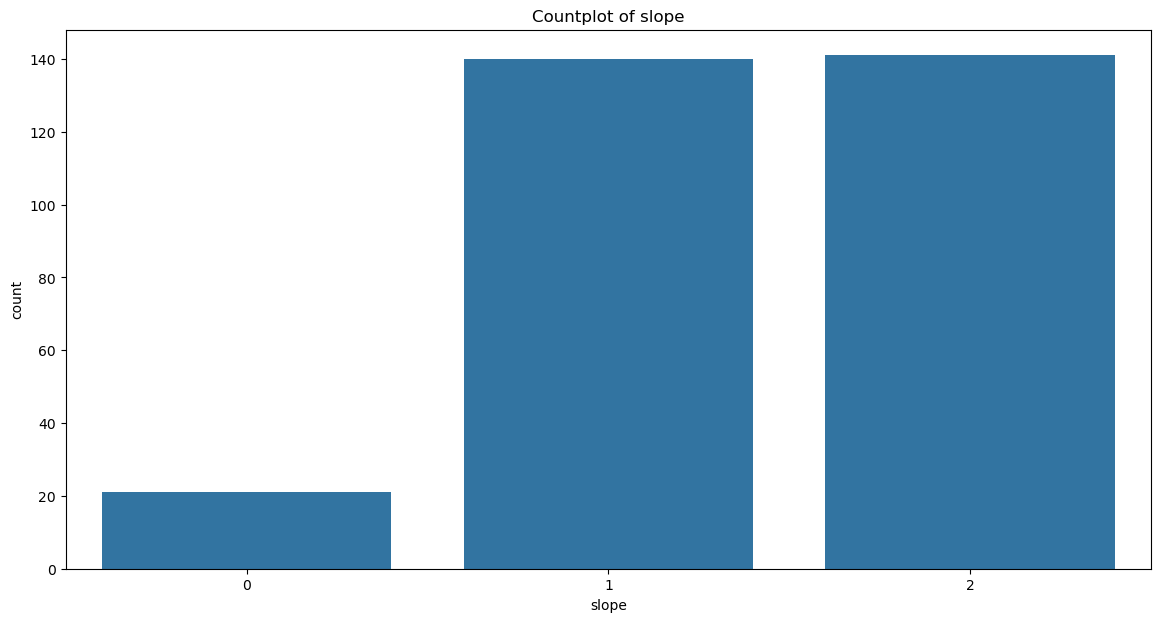

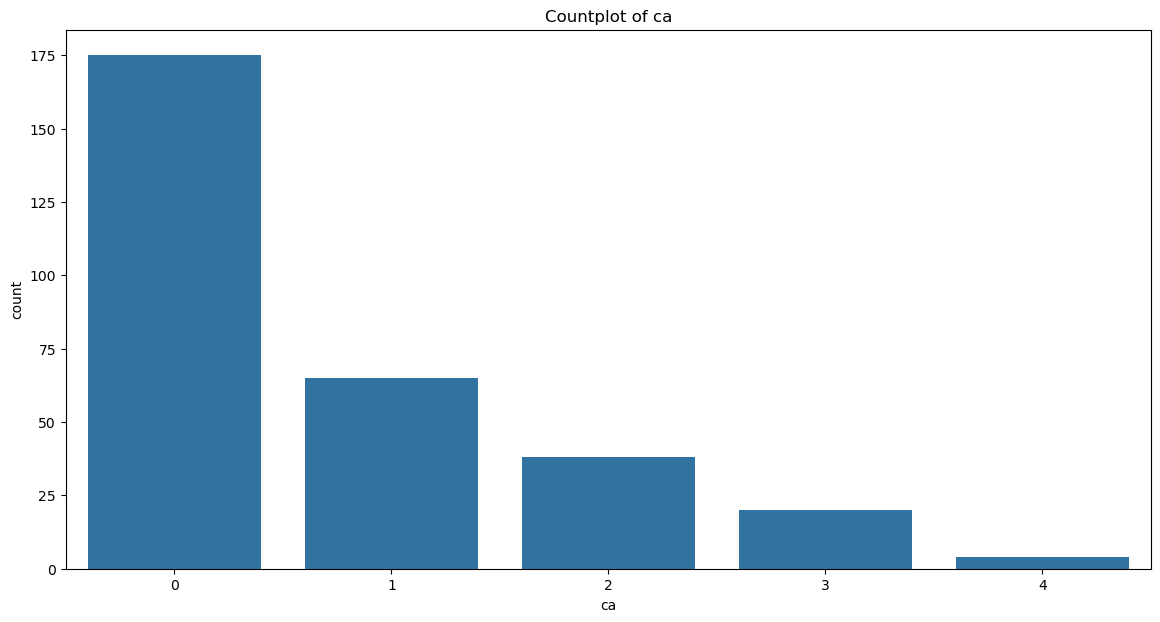

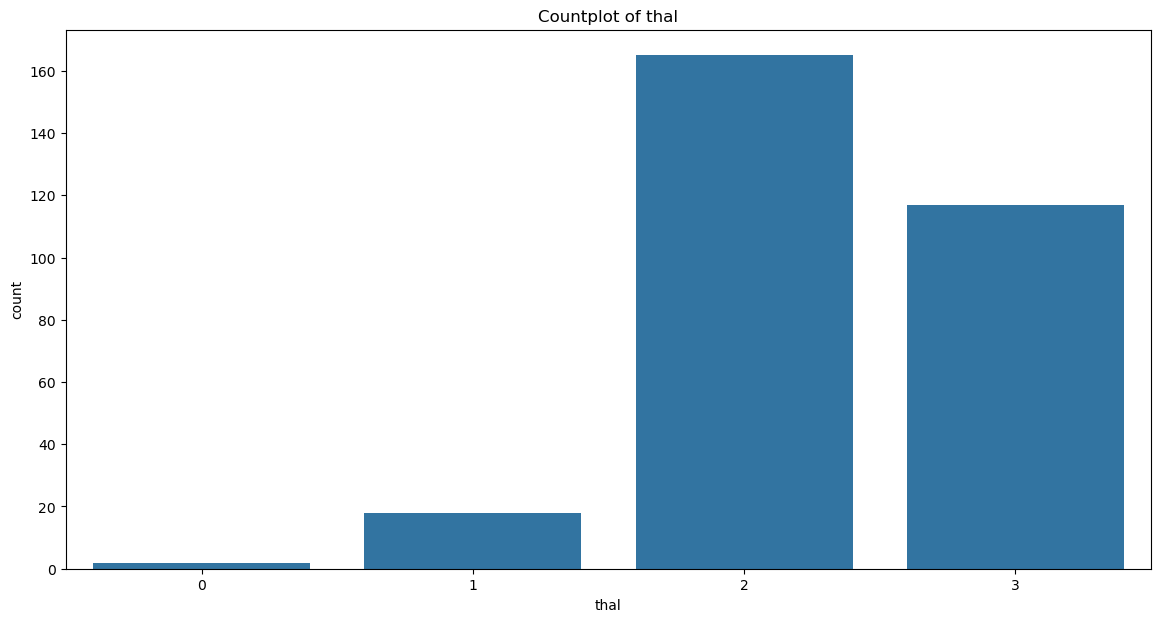

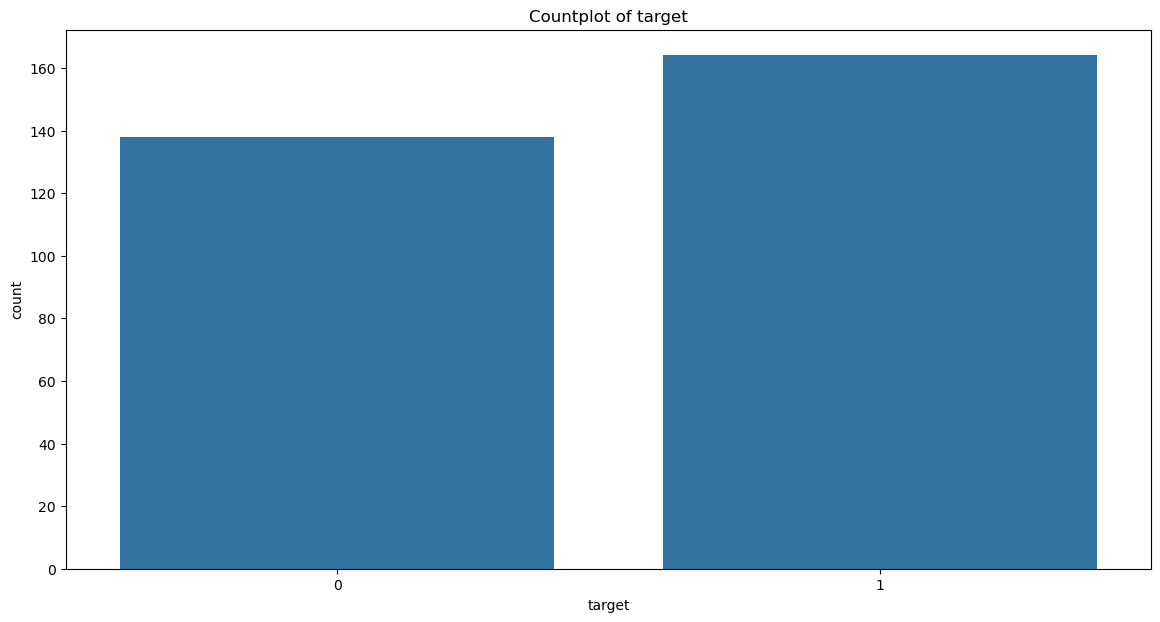

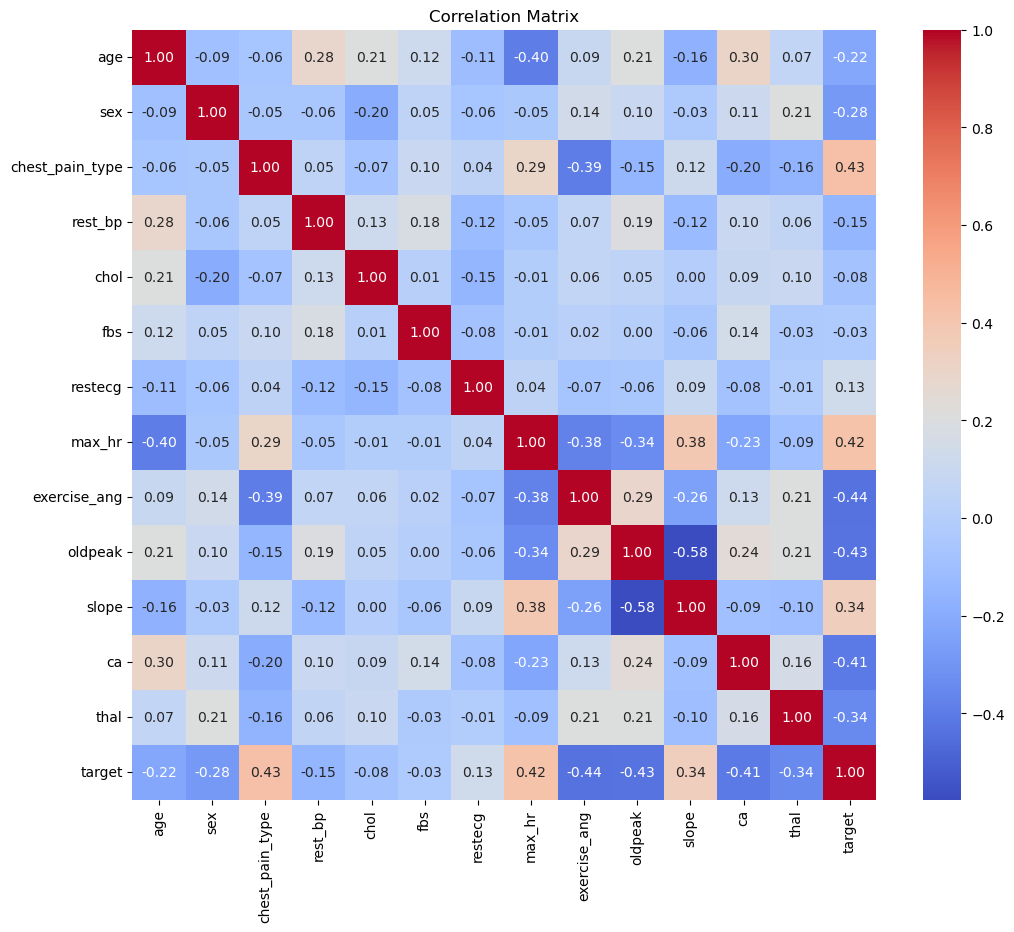

In [2]:
# Visualize distributions (numerical)
numerical_features = ['age', 'rest_bp', 'chol', 'max_hr', 'oldpeak']
for feature in numerical_features:
    plt.figure(figsize=(12, 3))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target', y=feature, data=data)
    plt.title(f'Box Plot: {feature} vs Target')
    plt.show()
    
# Visualize distribution (categorical)
categorical_features = ['sex', 'chest_pain_type', 'fbs', 'restecg', 'exercise_ang', 'slope', 'ca', 'thal', 'target']
for feature in categorical_features:
    plt.figure(figsize=(14, 7))
    sns.countplot(x=feature, data=data)
    plt.title(f'Countplot of {feature}')
    plt.show()

# heatmap (numerical)
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
fig1_heatmap = plt.gcf()
plt.show()

0      0
1      1
2      1
3      0
4      0
      ..
297    0
298    0
299    1
300    0
301    0
Name: exercise_ang, Length: 302, dtype: int64
   exercise_ang  target
0             0       0
1             1       0
2             1       0
3             0       0
4             0       0
       exercise_ang      target
count    302.000000  302.000000
mean       0.327815    0.543046
std        0.470196    0.498970
min        0.000000    0.000000
25%        0.000000    0.000000
50%        0.000000    1.000000
75%        1.000000    1.000000
max        1.000000    1.000000
exercise_ang  target
0             1         141
1             0          76
0             0          62
1             1          23
Name: count, dtype: int64
              exercise_ang    target
exercise_ang      1.000000 -0.435601
target           -0.435601  1.000000


<Figure size 1200x600 with 0 Axes>

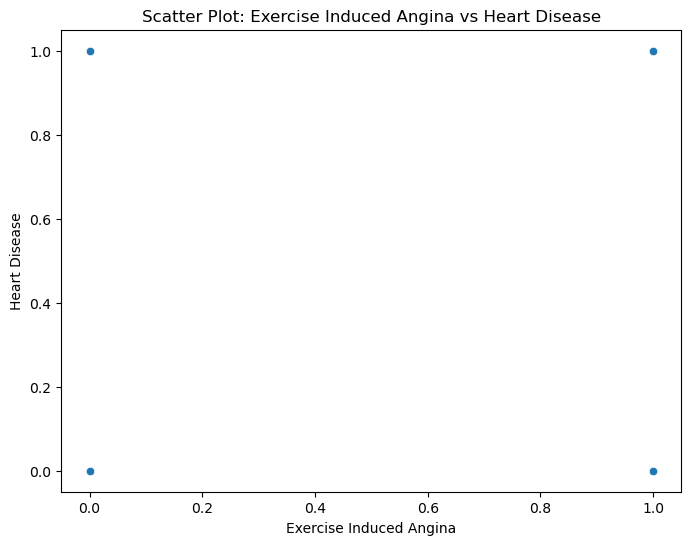

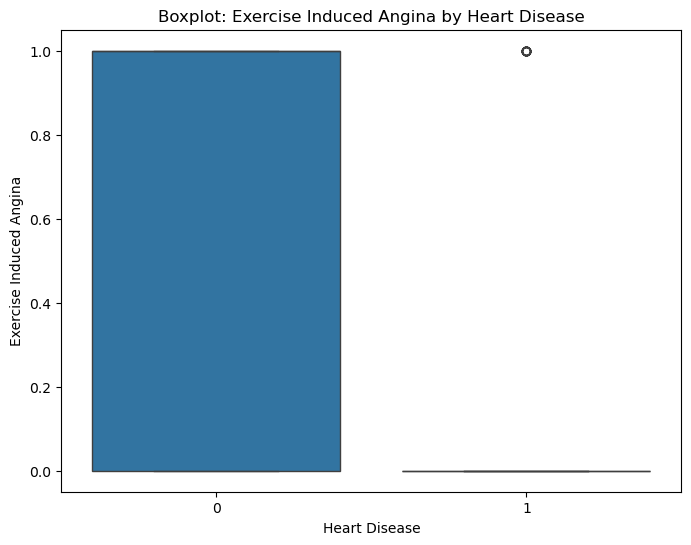

              exercise_ang    target
exercise_ang      1.000000 -0.435601
target           -0.435601  1.000000


In [5]:
#further explore relationship between exercise_ang and target
print(data['exercise_ang'])

print(data[['exercise_ang', 'target']].head())
print(data[['exercise_ang', 'target']].describe())
print(data[['exercise_ang', 'target']].value_counts())
correlation_matrix = data[['exercise_ang', 'target']].corr()
print(correlation_matrix)
plt.figure(figsize=(12, 6))

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='exercise_ang', y='target', data=data)
plt.title('Scatter Plot: Exercise Induced Angina vs Heart Disease')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Heart Disease')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='exercise_ang', data=data)
plt.title('Boxplot: Exercise Induced Angina by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Exercise Induced Angina')
plt.show()

correlation = data[['exercise_ang', 'target']].corr()
print(correlation)

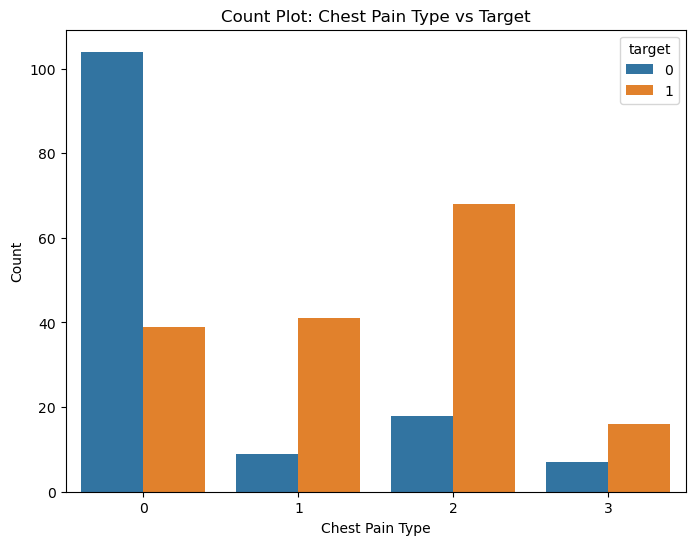

Chi-square test between 'sex' and 'target': chi2 = 23.08388, p-value = 0.0000015509
target    0   1
sex            
0        24  72
1       114  92
Chi-square test between 'chest_pain_type' and 'target': chi2 = 80.97876, p-value = 0.0000000000
target             0   1
chest_pain_type         
0                104  39
1                  9  41
2                 18  68
3                  7  16
Chi-square test between 'fbs' and 'target': chi2 = 0.09241, p-value = 0.7611374701
target    0    1
fbs             
0       116  141
1        22   23
Chi-square test between 'restecg' and 'target': chi2 = 9.72968, p-value = 0.0077130533
target    0   1
restecg        
0        79  68
1        56  95
2         3   1
Chi-square test between 'exercise_ang' and 'target': chi2 = 55.45620, p-value = 0.0000000000
target         0    1
exercise_ang         
0             62  141
1             76   23
Chi-square test between 'slope' and 'target': chi2 = 46.88948, p-value = 0.0000000001
target   0    1
slope

In [4]:
#Count plot for 'chest_pain_type'
plt.figure(figsize=(8, 6))
sns.countplot(x='chest_pain_type', hue='target', data=data)
plt.title('Count Plot: Chest Pain Type vs Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# Chi-square test (all categorical)
categorical_features = ['sex', 'chest_pain_type', 'fbs', 'restecg', 'exercise_ang', 'slope', 'ca', 'thal']
for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['target'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test between '{feature}' and 'target': chi2 = {chi2:.5f}, p-value = {p:.10f}")
    print(contingency_table)
    
# Point-biserial
numerical_features = ['age', 'rest_bp', 'chol', 'max_hr', 'oldpeak']
for feature in numerical_features:
    r, p_value = pointbiserialr(data[feature], data['target'])
    print(f"Point-biserial correlation between '{feature}' and 'target': r = {r:.5f}, p-value = {p_value:.10f}")

# Chi-square test 'chest_pain_type'
contingency_table = pd.crosstab(data['chest_pain_type'], data['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test between 'chest_pain_type' and 'target': chi2 = {chi2:.5f}, p-value = {p:.10f}")
print(contingency_table)

type1 = data[data['chest_pain_type'] == '0']
type2 = data[data['chest_pain_type'] == '1']
type3 = data[data['chest_pain_type'] == '2']
type4 = data[data['chest_pain_type'] == '3']

# Iterate over pairs of chest pain types
for type1 in range(4):  # Assuming chest pain types are integers 0, 1, 2, 3
    for type2 in range(type1 + 1, 4):
        # Filter data for each chest pain type
        data_type1 = data[data['chest_pain_type'] == str(type1)]
        data_type2 = data[data['chest_pain_type'] == str(type2)]
        
        # Print results
        print(f"Chi-square test between 'chest_pain_type' {type1} and {type2}: chi2 = {chi2:.5f}, p-value = {p:.10f}")


#Create a contingency table for 'chest_pain_type' and 'target'
contingency_table = pd.crosstab(data['chest_pain_type'], data['target'])
print(contingency_table)

# Perform Fisher's exact test
for chest_pain_type1 in range(4):  # Assuming chest pain types are integers 0, 1, 2, 3
    for chest_pain_type2 in range(chest_pain_type1 + 1, 4):
        sub_table = contingency_table.iloc[[chest_pain_type1, chest_pain_type2]]
        odds_ratio, p_value = stats.fisher_exact(sub_table)
        print(f"Fisher's exact test between 'chest_pain_type' {chest_pain_type1} and {chest_pain_type2}: odds_ratio = {odds_ratio:.5f}, p-value = {p_value:.10f}")

# Alternatively, you can perform Fisher's exact test on the entire contingency table if it's 2x2
if contingency_table.shape == (2, 2):
    odds_ratio, p_value = stats.fisher_exact(contingency_table)
    print(f"Fisher's exact test for the entire contingency table: odds_ratio = {odds_ratio:.5f}, p-value = {p_value:.10f}")

# Contingency table
contingency_table = pd.crosstab(data['exercise_ang'], data['target'])

# Perform Fisher's Exact Test
odds_ratio, p_value = stats.fisher_exact(contingency_table)

# Print the results
print(f"Fisher's Exact Test between 'exercise_ang' and 'target':")
print(f"Odds Ratio: {odds_ratio:.4f}")
print(f"P-value: {p_value:.10f}")
print("\nContingency Table:")
print(contingency_table)